https://colab.research.google.com/drive/1QwGKUfIetj-clGX9WURJ4PqeIw48zWr0

In [0]:
!git clone https://github.com/udacity/P1_Facial_Keypoints.git
!cd P1_Facial_Keypoints

Cloning into 'P1_Facial_Keypoints'...
remote: Enumerating objects: 5981, done.
remote: Total 5981 (delta 0), reused 0 (delta 0), pack-reused 5981
Receiving objects: 100% (5981/5981), 329.49 MiB | 14.28 MiB/s, done.
Resolving deltas: 100% (124/124), done.
Checking out files: 100% (5803/5803), done.


In [0]:
!ls

P1_Facial_Keypoints  sample_data


In [0]:
import os
import glob
root_dir = 'P1_Facial_Keypoints/data/training/'
all_img_paths = glob.glob(os.path.join(root_dir, '*.jpg'))

In [0]:
all_img_paths[:5]

['P1_Facial_Keypoints/data/training/Picabo_Street_40.jpg',
 'P1_Facial_Keypoints/data/training/Marc_Anthony_10.jpg',
 'P1_Facial_Keypoints/data/training/Jake_Gyllenhaal_51.jpg',
 'P1_Facial_Keypoints/data/training/Maggie_Smith_41.jpg',
 'P1_Facial_Keypoints/data/training/Matt_LeBlanc_21.jpg']

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('/content/P1_Facial_Keypoints/data/training_frames_keypoints.csv')
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135
0,Luis_Fonsi_21.jpg,45.0,98.0,47.0,106.0,49.0,110.0,53.0,119.0,56.0,125.0,62.0,130.0,66.0,134.0,73.0,136.0,81.0,139.0,92.0,134.0,96.0,130.0,98.0,126.0,102.0,120.0,102.0,111.0,104.0,105.0,104.0,99.0,102.0,90.0,51.0,89.0,56.0,87.0,60.0,...,68.0,119.0,73.0,117.0,77.0,115.0,79.0,117.0,81.0,115.0,85.0,117.0,90.0,117.0,87.0,122.0,85.0,124.0,81.0,124.0,77.0,124.0,73.0,121.0,70.0,119.0,77.0,119.0,79.0,119.0,83.0,119.0,90.0,117.0,83.0,119.0,81.0,122.0,77.0,122.0
1,Lincoln_Chafee_52.jpg,41.0,83.0,43.0,91.0,45.0,100.0,47.0,108.0,51.0,119.0,58.0,130.0,64.0,136.0,73.0,141.0,85.0,143.0,96.0,137.0,102.0,131.0,107.0,124.0,109.0,114.0,111.0,105.0,111.0,97.0,111.0,88.0,111.0,78.0,51.0,83.0,56.0,81.0,62.0,...,70.0,122.0,75.0,122.0,81.0,120.0,83.0,120.0,85.0,120.0,90.0,120.0,94.0,120.0,90.0,124.0,87.0,126.0,83.0,126.0,79.0,126.0,75.0,124.0,70.0,122.0,79.0,122.0,83.0,122.0,85.0,122.0,94.0,120.0,85.0,122.0,83.0,122.0,79.0,122.0
2,Valerie_Harper_30.jpg,56.0,69.0,56.0,77.0,56.0,86.0,56.0,94.0,58.0,103.0,60.0,111.0,62.0,116.0,67.0,122.0,75.0,127.0,86.0,127.0,96.0,123.0,105.0,121.0,113.0,114.0,118.0,106.0,122.0,100.0,124.0,91.0,128.0,81.0,58.0,56.0,62.0,54.0,67.0,...,67.0,103.0,69.0,101.0,73.0,101.0,75.0,101.0,77.0,101.0,84.0,103.0,88.0,108.0,82.0,110.0,77.0,110.0,75.0,110.0,71.0,110.0,69.0,107.0,67.0,103.0,73.0,103.0,75.0,105.0,79.0,105.0,86.0,108.0,77.0,105.0,75.0,105.0,73.0,105.0
3,Angelo_Reyes_22.jpg,61.0,80.0,58.0,95.0,58.0,108.0,58.0,120.0,58.0,132.0,61.0,141.0,64.0,148.0,73.0,157.0,85.0,163.0,101.0,163.0,116.0,164.0,128.0,161.0,137.0,155.0,144.0,143.0,150.0,134.0,156.0,121.0,162.0,109.0,70.0,68.0,76.0,65.0,85.0,...,76.0,129.0,82.0,130.0,88.0,127.0,91.0,130.0,98.0,130.0,104.0,133.0,110.0,139.0,101.0,142.0,95.0,145.0,88.0,142.0,82.0,142.0,79.0,139.0,76.0,129.0,85.0,133.0,91.0,133.0,98.0,136.0,107.0,139.0,95.0,139.0,91.0,139.0,85.0,136.0
4,Kristen_Breitweiser_11.jpg,58.0,94.0,58.0,104.0,60.0,113.0,62.0,121.0,67.0,130.0,71.0,136.0,75.0,138.0,81.0,141.0,92.0,143.0,105.0,139.0,113.0,135.0,122.0,129.0,126.0,122.0,128.0,112.0,130.0,103.0,130.0,95.0,130.0,86.0,58.0,81.0,60.0,74.0,64.0,...,75.0,121.0,79.0,117.0,84.0,115.0,86.0,115.0,90.0,113.0,96.0,115.0,103.0,118.0,98.0,122.0,92.0,124.0,88.0,124.0,84.0,126.0,79.0,124.0,77.0,121.0,84.0,117.0,88.0,117.0,92.0,117.0,103.0,118.0,92.0,120.0,88.0,122.0,84.0,122.0


In [0]:
data.shape, len(all_img_paths)

((3462, 137), 3462)

In [0]:
from keras.applications import vgg16
from keras.utils.vis_utils import plot_model
from keras.applications.vgg16 import preprocess_input
vgg16_model = vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))

Using TensorFlow backend.






58892288/58889256 [==============================] - 5s 0us/step




In [0]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
import cv2
import numpy as np
from copy import deepcopy
x=[]
x_img = []
y=[]
for i in range(data.shape[0]):
  if(i%100==0):
    print(i)
  img_path = '/content/P1_Facial_Keypoints/data/training/' + data.iloc[i,0]
  img = cv2.imread(img_path)
  #print(img.shape)
  kp = deepcopy(data.iloc[i,1:].tolist())
  kp_x = (np.array(kp[0::2])/img.shape[1]).tolist()
  kp_y = (np.array(kp[1::2])/img.shape[0]).tolist()
  kp2 = kp_x + kp_y
  img = cv2.resize(img,(224,224))
  preprocess_img = preprocess_input(img.reshape(1,224,224,3))
  vgg16_img = vgg16_model.predict(preprocess_img)
  x_img.append(img)
  x.append(vgg16_img)
  y.append(kp2)

In [0]:
import matplotlib.pyplot as plt # Added this line 

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


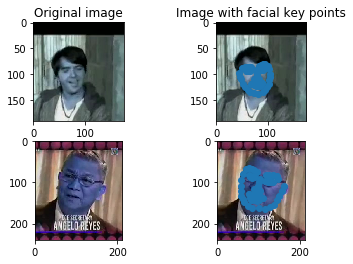

In [0]:
plt.subplot(222)
plt.title('Image with facial key points')
img_path = '/content/P1_Facial_Keypoints/data/training/' + data.iloc[0,0]
img = cv2.imread(img_path)
kp = deepcopy(data.iloc[0,1:].tolist())
plt.scatter(kp[0::2], kp[1::2])
plt.grid('off')
plt.imshow(img)
plt.subplot(224)
img_path = '/content/P1_Facial_Keypoints/data/training/' + data.iloc[3,0]
img = cv2.imread(img_path)
kp = deepcopy(data.iloc[3,1:].tolist())
plt.scatter(kp[0::2], kp[1::2])
plt.grid('off')
plt.imshow(img)
plt.subplot(221)
plt.title('Original image')
img_path = '/content/P1_Facial_Keypoints/data/training/' + data.iloc[0,0]
img = cv2.imread(img_path)
kp = deepcopy(data.iloc[0,1:].tolist())
plt.grid('off')
plt.imshow(img)
plt.subplot(223)
img_path = '/content/P1_Facial_Keypoints/data/training/' + data.iloc[3,0]
img = cv2.imread(img_path)
kp = deepcopy(data.iloc[3,1:].tolist())
plt.grid('off')
plt.imshow(img)

In [0]:
np.max(x)

451.559

In [0]:
x = np.array(x)
vgg16_x = vgg16_model.predict(x.reshape(-1,224,224,3))

In [0]:
x = x.reshape(x.shape[0],7,7,512)

In [0]:
y = np.array(y)
y.shape

(3462, 136)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [0]:
model_vgg16 = Sequential()
model_vgg16.add(Conv2D(512, kernel_size=(3, 3), activation='relu',input_shape=(vgg16_x.shape[1],vgg16_x.shape[2],vgg16_x.shape[3])))
model_vgg16.add(MaxPooling2D(pool_size=(2, 2)))
model_vgg16.add(Flatten())
model_vgg16.add(Dense(512, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(y.shape[1], activation='sigmoid'))
model_vgg16.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 5, 5, 512)         2359808   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 512)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 136)               69768     
Total

In [0]:
model_vgg16.compile(loss='mean_absolute_error',optimizer='adam')
history = model_vgg16.fit(x/np.max(x), y, epochs=10, batch_size=32, verbose=1, validation_split = 0.1)


Train on 3115 samples, validate on 347 samples
Epoch 1/10
3115/3115 [==============================] - 3s 946us/step - loss: 0.0467 - val_loss: 0.0284
Epoch 2/10
3115/3115 [==============================] - 2s 515us/step - loss: 0.0286 - val_loss: 0.0219
Epoch 3/10
3115/3115 [==============================] - 2s 518us/step - loss: 0.0233 - val_loss: 0.0197
Epoch 4/10
3115/3115 [==============================] - 2s 518us/step - loss: 0.0204 - val_loss: 0.0182
Epoch 5/10
3115/3115 [==============================] - 2s 516us/step - loss: 0.0185 - val_loss: 0.0177
Epoch 6/10
3115/3115 [==============================] - 2s 512us/step - loss: 0.0173 - val_loss: 0.0176
Epoch 7/10
3115/3115 [==============================] - 2s 522us/step - loss: 0.0163 - val_loss: 0.0176
Epoch 8/10
3115/3115 [==============================] - 2s 516us/step - loss: 0.0158 - val_loss: 0.0171
Epoch 9/10
3115/3115 [==============================] - 2s 525us/step - loss: 0.0152 - val_loss: 0.0164
Epoch 10/10
3115

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


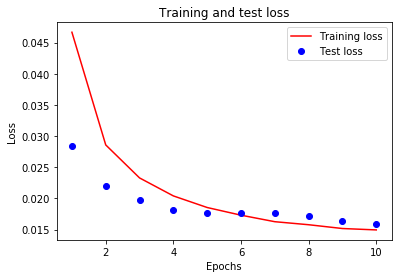

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(val_loss_values) + 1)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()


In [0]:
pred = model_vgg16.predict(vgg16_model.predict(preprocess_input(x_img[-2].reshape(1,224,224,3)))/np.max(x))

In [0]:
pred.shape

(1, 136)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


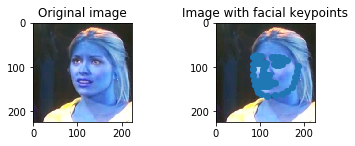

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.title('Original image')
plt.imshow(x_img[-2])
plt.grid('off')
plt.subplot(222)
plt.title('Image with facial keypoints')
plt.imshow(x_img[-2])
kp = pred.flatten()
plt.scatter(kp[0:68]*224, kp[68:]*224)
plt.grid('off')